In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_theme()
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
CCBL = pd.read_csv('home-credit-default-risk\credit_card_balance.csv')

In [5]:
CCBL

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.97,135000,0.00,877.50,0.00,877.50,"1,700.33",...,0.00,0.00,0.00,1,0.00,1.00,35.00,Active,0,0
1,2582071,363914,-1,"63,975.56",45000,"2,250.00","2,250.00",0.00,0.00,"2,250.00",...,"64,875.56","64,875.56",1.00,1,0.00,0.00,69.00,Active,0,0
2,1740877,371185,-7,"31,815.22",450000,0.00,0.00,0.00,0.00,"2,250.00",...,"31,460.08","31,460.08",0.00,0,0.00,0.00,30.00,Active,0,0
3,1389973,337855,-4,"236,572.11",225000,"2,250.00","2,250.00",0.00,0.00,"11,795.76",...,"233,048.97","233,048.97",1.00,1,0.00,0.00,10.00,Active,0,0
4,1891521,126868,-1,"453,919.46",450000,0.00,"11,547.00",0.00,"11,547.00","22,924.89",...,"453,919.46","453,919.46",0.00,1,0.00,1.00,101.00,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.00,45000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Active,0,0
3840308,1714892,347207,-9,0.00,45000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0,0.00,0.00,23.00,Active,0,0
3840309,1302323,215757,-9,"275,784.97",585000,"270,000.00","270,000.00",0.00,0.00,"2,250.00",...,"273,093.97","273,093.97",2.00,2,0.00,0.00,18.00,Active,0,0
3840310,1624872,430337,-10,0.00,450000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Active,0,0


SK_ID_PREV ,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)",hashed

SK_ID_CURR,ID of loan in our sample,hashed

MONTHS_BALANCE,Month of balance relative to application date (-1 means the freshest balance date),time only relative to the application

AMT_BALANCE,Balance during the month of previous credit,

AMT_CREDIT_LIMIT_ACTUAL,Credit card limit during the month of the previous credit,

AMT_DRAWINGS_ATM_CURRENT,Amount drawing at ATM during the month of the previous credit,

AMT_DRAWINGS_CURRENT,Amount drawing during the month of the previous credit,

AMT_DRAWINGS_OTHER_CURRENT,Amount of other drawings during the month of the previous credit,

AMT_DRAWINGS_POS_CURRENT,Amount drawing or buying goods during the month of the previous credit,

AMT_INST_MIN_REGULARITY,Minimal installment for this month of the previous credit,

AMT_PAYMENT_CURRENT,How much did the client pay during the month on the previous credit,

AMT_PAYMENT_TOTAL_CURRENT,How much did the client pay during the month in total on the previous credit,

AMT_RECEIVABLE_PRINCIPAL,Amount receivable for principal on the previous credit,

AMT_RECIVABLE,Amount receivable on the previous credit,

AMT_TOTAL_RECEIVABLE,Total amount receivable on the previous credit,

CNT_DRAWINGS_ATM_CURRENT,Number of drawings at ATM during this month on the previous credit,

CNT_DRAWINGS_CURRENT,Number of drawings during this month on the previous credit,

CNT_DRAWINGS_OTHER_CURRENT,Number of other drawings during this month on the previous credit,

CNT_DRAWINGS_POS_CURRENT,Number of drawings for goods during this month on the previous credit,

CNT_INSTALMENT_MATURE_CUM,Number of paid installments on the previous credit,

NAME_CONTRACT_STATUS,"Contract status (active signed,...) on the previous credit",

SK_DPD,DPD (Days past due) during the month on the previous credit,

SK_DPD_DEF,DPD (Days past due) during the month with tolerance (debts with low loan amounts are ignored) of the previous credit,


In [6]:
CCBL.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.97,135000,0.00,877.50,0.00,877.50,"1,700.33",...,0.00,0.00,0.00,1,0.00,1.00,35.00,Active,0,0
1,2582071,363914,-1,"63,975.56",45000,"2,250.00","2,250.00",0.00,0.00,"2,250.00",...,"64,875.56","64,875.56",1.00,1,0.00,0.00,69.00,Active,0,0
2,1740877,371185,-7,"31,815.22",450000,0.00,0.00,0.00,0.00,"2,250.00",...,"31,460.08","31,460.08",0.00,0,0.00,0.00,30.00,Active,0,0
3,1389973,337855,-4,"236,572.11",225000,"2,250.00","2,250.00",0.00,0.00,"11,795.76",...,"233,048.97","233,048.97",1.00,1,0.00,0.00,10.00,Active,0,0
4,1891521,126868,-1,"453,919.46",450000,0.00,"11,547.00",0.00,"11,547.00","22,924.89",...,"453,919.46","453,919.46",0.00,1,0.00,1.00,101.00,Active,0,0


In [44]:
CCBL.sort_values(by= "SK_ID_CURR")

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
584804,1489396,100006,-1,0.00,270000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Active,0,0
1399895,1489396,100006,-4,0.00,270000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Active,0,0
520387,1489396,100006,-2,0.00,270000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Active,0,0
1636141,1489396,100006,-6,0.00,270000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Active,0,0
655566,1489396,100006,-5,0.00,270000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049726,1794451,456250,-2,"158,266.93",175500,0.00,0.00,0.00,0.00,"8,477.73",...,"158,266.93","158,266.93",0.00,0,0.00,0.00,9.00,Active,0,0
2248506,1794451,456250,-7,"174,435.89",180000,0.00,0.00,0.00,0.00,"9,240.70",...,"174,435.89","174,435.89",0.00,0,0.00,0.00,4.00,Active,0,0
3734047,1794451,456250,-9,"180,536.76",180000,0.00,0.00,0.00,0.00,"9,653.99",...,"179,866.26","179,866.26",0.00,0,0.00,0.00,2.00,Active,0,0
140639,1794451,456250,-1,"153,832.73",175500,0.00,0.00,0.00,0.00,"8,286.39",...,"153,832.73","153,832.73",0.00,0,0.00,0.00,10.00,Active,0,0


In [7]:
CCBL.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [8]:
CCBL.duplicated().sum()

0

In [9]:
CCBL.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [11]:
def check_missed_values(df):
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index).sort_values(ascending= False).reset_index()
    df_null_percentage.columns = ["Feature", "Percentage"]
    return df_null_percentage

null_df = check_missed_values(CCBL)

<AxesSubplot:xlabel='Percentage', ylabel='Feature'>

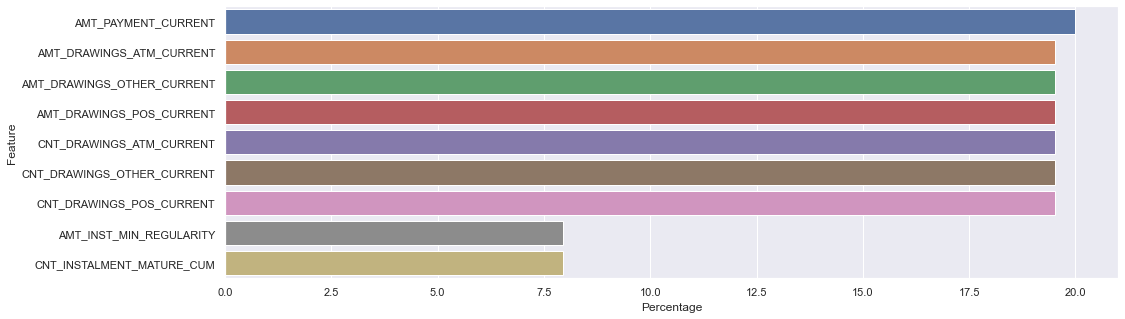

In [12]:
plt.figure(figsize=(16,5))
sns.barplot(x=  null_df["Percentage"] , y= null_df["Feature"] )

In [ ]:
CCBL.info()

In [ ]:
CCBL.describe().T

In [14]:
def draw_distribution(x, title,c):
    fig, ax = plt.subplots(2,1,figsize=(20,10))

    sns.distplot(x,ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')

    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')

    fig.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show()

In [15]:
CCBL["NAME_CONTRACT_STATUS"].value_counts(normalize= True) * 100

Active          96.31
Completed        3.36
Signed           0.29
Demand           0.04
Sent proposal    0.01
Refused          0.00
Approved         0.00
Name: NAME_CONTRACT_STATUS, dtype: float64

In [16]:
## get the most recent record of this dataset
CCBL_filter = CCBL.sort_values(by=['MONTHS_BALANCE']).groupby(["SK_ID_CURR", "SK_ID_PREV"]).last().reset_index()
CCBL_filter

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,100006,1489396,-1,0.00,270000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Active,0,0
1,100011,1843384,-2,0.00,90000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0,0.00,0.00,33.00,Active,0,0
2,100013,2038692,-1,0.00,45000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0,0.00,0.00,22.00,Active,0,0
3,100021,2594025,-2,0.00,675000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Completed,0,0
4,100023,1499902,-4,0.00,225000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104302,456244,2181926,-1,0.00,0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0,0.00,0.00,17.00,Completed,0,0
104303,456246,1079732,-2,62.69,135000,0.00,"1,052.55",0.00,"1,052.55",130.50,...,62.19,62.19,0.00,1,0.00,1.00,7.00,Active,0,0
104304,456247,1595171,-2,0.00,0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0,0.00,0.00,32.00,Active,0,0
104305,456248,2743495,-2,0.00,900000,NaN,0.00,NaN,NaN,0.00,...,0.00,0.00,NaN,0,NaN,NaN,0.00,Active,0,0


In [18]:
Train_df = pd.read_csv("home-credit-default-risk\\application_train.csv")
Train_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,"202,500.00","406,597.50","24,700.50",...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,"270,000.00","1,293,502.50","35,698.50",...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,"67,500.00","135,000.00","6,750.00",...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,"135,000.00","312,682.50","29,686.50",...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,"121,500.00","513,000.00","21,865.50",...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,"157,500.00","254,700.00","27,558.00",...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,"72,000.00","269,550.00","12,001.50",...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,"153,000.00","677,664.00","29,979.00",...,0,0,0,0,1.00,0.00,0.00,1.00,0.00,1.00
307509,456254,1,Cash loans,F,N,Y,0,"171,000.00","370,107.00","20,205.00",...,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00


# Feature

Number of Loan per customer

In [26]:
CCBL_filter["Completed_Flag"] = CCBL_filter["NAME_CONTRACT_STATUS"].apply(lambda x: 1 if x== "Completed" else 0)
CCBL_filter["Completed_Count"] = CCBL_filter.groupby(["SK_ID_CURR"])["Completed_Flag"].transform("sum")
CCBL_filter.drop(["Completed_Flag"], axis=1, inplace= True)
CCBL_filter

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,Completed_Count
0,100006,1489396,-1,0.00,270000,NaN,0.00,NaN,NaN,0.00,...,0.00,NaN,0,NaN,NaN,0.00,Active,0,0,0
1,100011,1843384,-2,0.00,90000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,33.00,Active,0,0,0
2,100013,2038692,-1,0.00,45000,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,22.00,Active,0,0,0
3,100021,2594025,-2,0.00,675000,NaN,0.00,NaN,NaN,0.00,...,0.00,NaN,0,NaN,NaN,0.00,Completed,0,0,1
4,100023,1499902,-4,0.00,225000,NaN,0.00,NaN,NaN,0.00,...,0.00,NaN,0,NaN,NaN,0.00,Active,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104302,456244,2181926,-1,0.00,0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,17.00,Completed,0,0,1
104303,456246,1079732,-2,62.69,135000,0.00,"1,052.55",0.00,"1,052.55",130.50,...,62.19,0.00,1,0.00,1.00,7.00,Active,0,0,0
104304,456247,1595171,-2,0.00,0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0.00,0.00,32.00,Active,0,0,0
104305,456248,2743495,-2,0.00,900000,NaN,0.00,NaN,NaN,0.00,...,0.00,NaN,0,NaN,NaN,0.00,Active,0,0,0


In [28]:
CCBL_filter[CCBL_filter["SK_ID_CURR"] == 355767]

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,Completed_Count
74701,355767,1455237,-1,0.00,630000,NaN,0.00,NaN,NaN,0.00,...,0.00,NaN,0,NaN,NaN,0.00,Completed,0,0,3
74702,355767,2220124,-1,0.00,450000,NaN,0.00,NaN,NaN,0.00,...,0.00,NaN,0,NaN,NaN,0.00,Completed,0,0,3
74703,355767,2327490,-1,0.00,157500,NaN,0.00,NaN,NaN,0.00,...,0.00,NaN,0,NaN,NaN,0.00,Active,0,0,3
74704,355767,2812489,-1,0.00,135000,NaN,0.00,NaN,NaN,0.00,...,0.00,NaN,0,NaN,NaN,0.00,Completed,0,0,3


<AxesSubplot:xlabel='Completed_Count'>

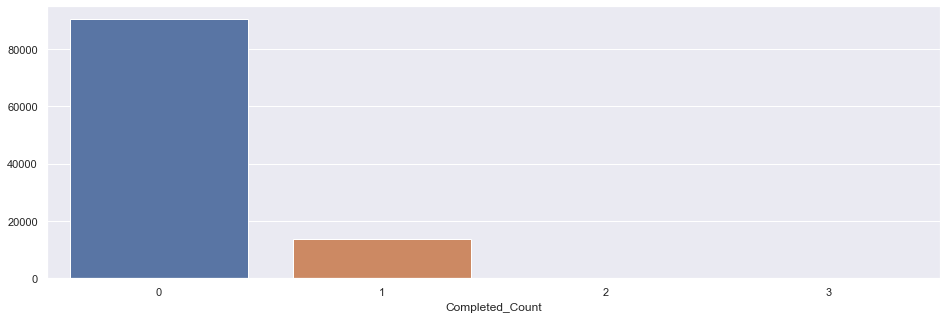

In [33]:
completed_count_SK = CCBL_filter.groupby(["Completed_Count"]).size()
plt.figure(figsize=(16,5))
sns.barplot(x=  completed_count_SK.index , y= completed_count_SK.values )

In [34]:
CCBL_merged = pd.merge(Train_df[["SK_ID_CURR", "TARGET"]], CCBL_filter, how= "left", on=["SK_ID_CURR"])
CCBL_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,Completed_Count
0,100002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,"1,489,396.00",-1.00,0.00,"270,000.00",NaN,0.00,NaN,NaN,...,0.00,NaN,0.00,NaN,NaN,0.00,Active,0.00,0.00,0.00
4,100007,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308053,456251,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308054,456252,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308055,456253,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308056,456254,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
CCBL_merged[CCBL_merged["SK_ID_CURR"] == 355767]

,SK_ID_CURR,TARGET,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,...,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,Completed_Count
221191,355767,0,"1,455,237.00",-1.00,0.00,"630,000.00",NaN,0.00,NaN,NaN,...,0.00,NaN,0.00,NaN,NaN,0.00,Completed,0.00,0.00,3.00
221192,355767,0,"2,220,124.00",-1.00,0.00,"450,000.00",NaN,0.00,NaN,NaN,...,0.00,NaN,0.00,NaN,NaN,0.00,Completed,0.00,0.00,3.00
221193,355767,0,"2,327,490.00",-1.00,0.00,"157,500.00",NaN,0.00,NaN,NaN,...,0.00,NaN,0.00,NaN,NaN,0.00,Active,0.00,0.00,3.00
221194,355767,0,"2,812,489.00",-1.00,0.00,"135,000.00",NaN,0.00,NaN,NaN,...,0.00,NaN,0.00,NaN,NaN,0.00,Completed,0.00,0.00,3.00


C:\Users\Duc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Duc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Defaulter')]

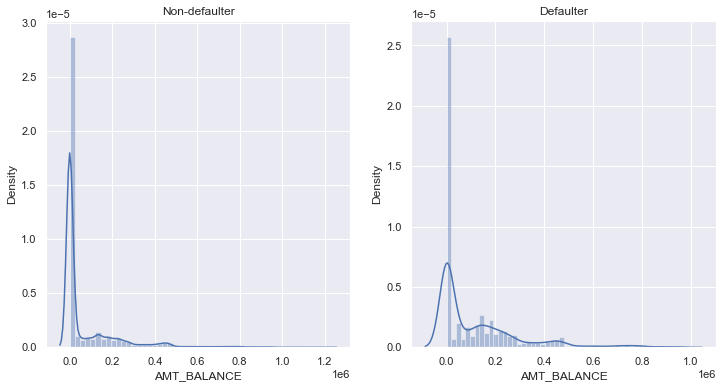

In [46]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(CCBL_merged[CCBL_merged["TARGET"] == 0]['AMT_BALANCE'].dropna(), ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(CCBL_merged[CCBL_merged["TARGET"] == 1]['AMT_BALANCE'].dropna(), ax= ax[1]).set(title = "Defaulter")

C:\Users\Duc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Duc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Defaulter')]

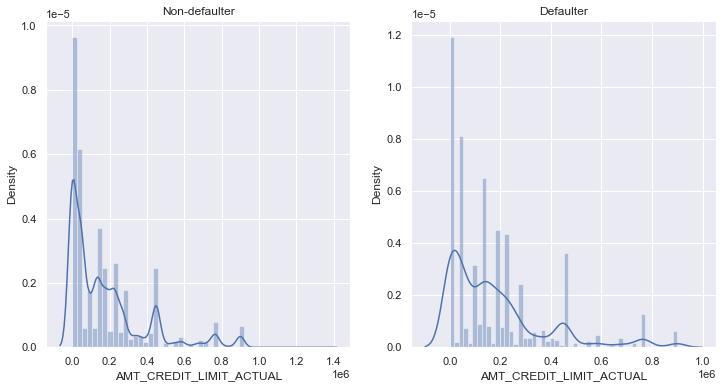

In [47]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(CCBL_merged[CCBL_merged["TARGET"] == 0]['AMT_CREDIT_LIMIT_ACTUAL'].dropna(), ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(CCBL_merged[CCBL_merged["TARGET"] == 1]['AMT_CREDIT_LIMIT_ACTUAL'].dropna(), ax= ax[1]).set(title = "Defaulter")

C:\Users\Duc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Duc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Defaulter')]

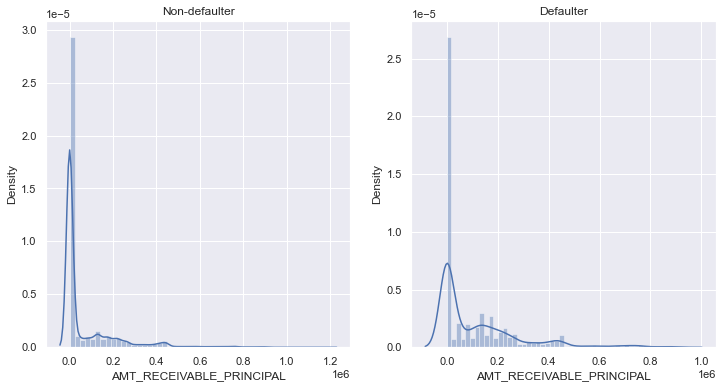

In [48]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(CCBL_merged[CCBL_merged["TARGET"] == 0]['AMT_RECEIVABLE_PRINCIPAL'].dropna(), ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(CCBL_merged[CCBL_merged["TARGET"] == 1]['AMT_RECEIVABLE_PRINCIPAL'].dropna(), ax= ax[1]).set(title = "Defaulter")

C:\Users\Duc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Duc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Defaulter')]

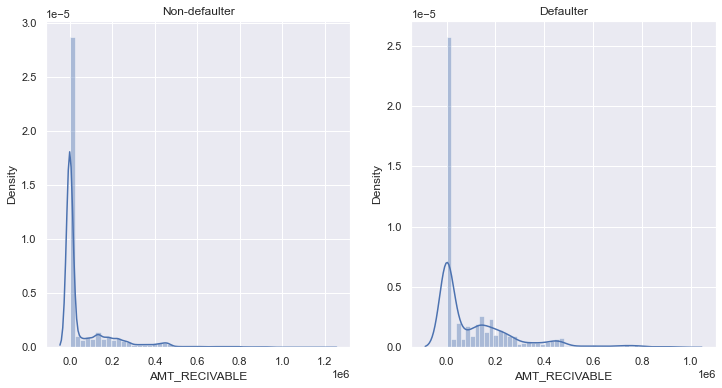

In [49]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(CCBL_merged[CCBL_merged["TARGET"] == 0]['AMT_RECIVABLE'].dropna(), ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(CCBL_merged[CCBL_merged["TARGET"] == 1]['AMT_RECIVABLE'].dropna(), ax= ax[1]).set(title = "Defaulter")

C:\Users\Duc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Duc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Defaulter')]

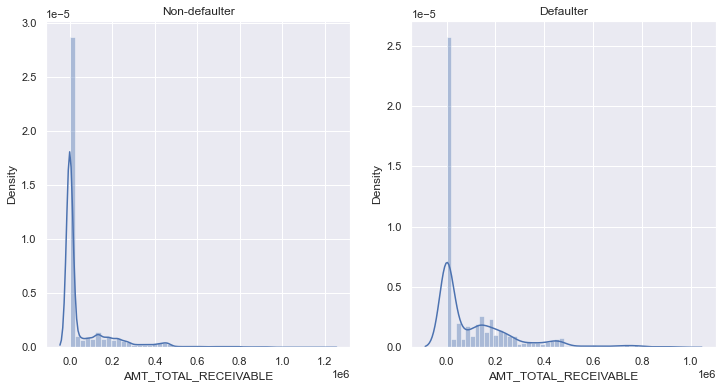

In [50]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.distplot(CCBL_merged[CCBL_merged["TARGET"] == 0]['AMT_TOTAL_RECEIVABLE'].dropna(), ax= ax[0]).set(title = "Non-defaulter")
sns.distplot(CCBL_merged[CCBL_merged["TARGET"] == 1]['AMT_TOTAL_RECEIVABLE'].dropna(), ax= ax[1]).set(title = "Defaulter")

C:\Users\Duc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

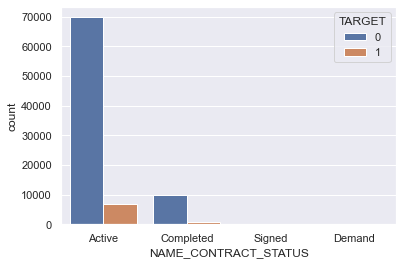

In [54]:
sns.countplot(CCBL_merged['NAME_CONTRACT_STATUS'].dropna(), hue=CCBL_merged['TARGET'])